<a href="https://colab.research.google.com/github/HoodBlack/CNN_SKKU/blob/main/OpenCV_proto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip list | grep opencv

opencv-contrib-python         4.7.0.72
opencv-python                 4.7.0.72
opencv-python-headless        4.7.0.72


In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Sample Data

In [5]:
image_src = '/content/drive/MyDrive/meat_data/원천데이터/1. 소도제/1.segmentation/1/QC_cow_segmentation_1_000646.jpg'

In [10]:
image_1=cv2.imread(image_src)

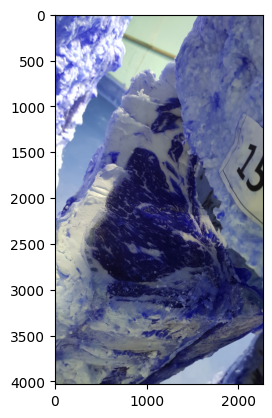

In [13]:
plt.imshow(image_1)
plt.show()

In [15]:
image_rgb=cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)

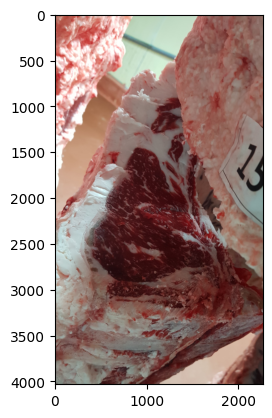

In [16]:
plt.imshow(image_rgb)

In [19]:
image_rgb.shape

(4032, 2268, 3)

# Reading Json files

In [22]:
import json

In [80]:
file_path = '/content/drive/MyDrive/meat_data/라벨링데이터/1.소도체/QC_cow_segmentation_1_000646.json'

In [81]:
  with open(file_path, 'r') as file:
    data=json.load(file)
    print(data)

{'label_info': {'image': {'file_name': 'QC_cow_segmentation_1_000646.jpg', 'width': 2268, 'height': 4032}, 'shapes': [{'label': 'hanwoo', 'points': [[919.6666666666667, 1479.1666666666667], [959.25, 1475.0], [990.5, 1491.6666666666667], [1044.6666666666667, 1527.0833333333335], [1065.5, 1539.5833333333335], [1088.4166666666667, 1581.25], [1115.5, 1627.0833333333335], [1134.25, 1658.3333333333335], [1163.4166666666667, 1716.6666666666667], [1184.25, 1768.75], [1207.1666666666667, 1797.9166666666667], [1228.0, 1872.9166666666667], [1246.75, 1916.6666666666667], [1263.4166666666667, 1937.5], [1275.9166666666667, 1939.5833333333335], [1278.0, 1916.6666666666667], [1250.9166666666667, 1820.8333333333335], [1246.75, 1793.75], [1267.5833333333335, 1795.8333333333335], [1346.75, 1850.0], [1363.4166666666667, 1891.6666666666667], [1392.5833333333335, 1958.3333333333335], [1407.1666666666667, 2004.1666666666667], [1461.3333333333335, 2066.666666666667], [1463.4166666666667, 2131.25], [1480.08333

In [ ]:
with open(file_path, 'r') as file:
  data=json.load(file)
  points=np.array(data['label_info']['shapes'][0]['points'],dtype=np.int32)
  print(points)

In [ ]:
print(points)

# Image Labeling

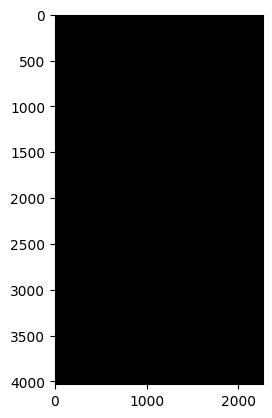

In [89]:
mask_basic=np.zeros_like(image_rgb)
plt.imshow(mask_basic)

In [62]:
color=(255,255,255)
thickness=10

In [90]:
mask_image=cv2.fillConvexPoly(mask_basic,points,(255,255,255))

In [96]:
mask_image.shape

(4032, 2268, 3)

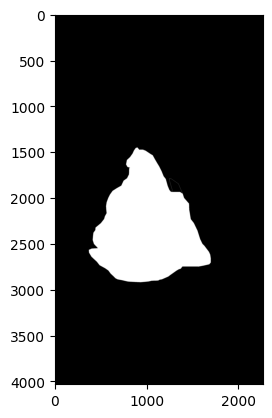

In [91]:
plt.imshow(mask_image)

In [93]:
filtered_img=cv2.bitwise_and(image_rgb, mask_image)

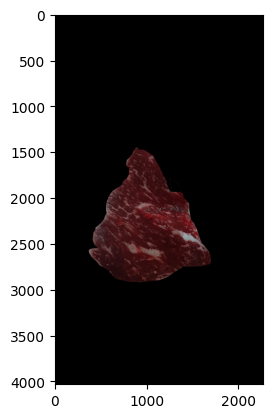

In [94]:
plt.imshow(filtered_img)